# Rule of Five

Not all molecules will actually be taken up into the body when ingested.
The field of pharmacokinetics studies what happens to a drug in your body, focusing on four major steps with the acronym ADME:

 - **absorption**: The amount of a drug taken into your body and the time it takes to be absorbed, which depends on things like solubility, chemical stability in the stomach, etc.
 
 - **distribution**: The distribution of the drug in the body -- which tissues it ends up in in which proportions. For example, does it cross the blood-brain barrier?
 
 - **metabolism**: How the drug gets metabolized (chemically processed and broken down) by your body.
 
 - **excretion**: How the drug is removed from your body, through the kidneys (urine) or intestines (feces).

The term *lead compound* refers to a compound with chemical properties that make it promising as a potential drug, prior to preclinical and clinical testing (i.e. it is a "leading compound" in the search for a drug).
Another term is "developmental candidate."

An important piece of ADME is bioavailability.
*Lipinski's rule of five* (Ro5) predicts bioavailability based solely on chemical structure.
It says that poor absorption and permeation of a compound is more likely if it violates more than one of the following rules:
1. Molecular weight (MWT) <= 500 Daltons
2. Number of hydrogen bond acceptors (HBAs) <= 10
3. Number of hydrogen bond donors (HBD) <= 5
4. Calculated LogP (octanol-water coefficient) <= 5

The origin of the name is that all of these numbers are multiples of five (not that there are five conditions).

*LogP* here is the octanol-water partition coefficient, i.e. the proportion that ends up in octanol versus water in an immiscible mixture.
A negative value means that the compound is hydrophilic, whereas a positive value means it is more hydrophobic.

## 1. Set up some example molecules

In [1]:
smiles = [
    "CCC1C(=O)N(CC(=O)N(C(C(=O)NC(C(=O)N(C(C(=O)NC(C(=O)NC(C(=O)N(C(C(=O)N(C(C(=O)N(C(C(=O)N(C(C(=O)N1)C(C(C)CC=CC)O)C)C(C)C)C)CC(C)C)C)CC(C)C)C)C)C)CC(C)C)C)C(C)C)CC(C)C)C)C",
    "CN1CCN(CC1)C2=C3C=CC=CC3=NC4=C(N2)C=C(C=C4)C",
    "CC1=C(C(CCC1)(C)C)C=CC(=CC=CC(=CC=CC=C(C)C=CC=C(C)C=CC2=C(CCCC2(C)C)C)C)C",
    "CCCCCC1=CC(=C(C(=C1)O)C2C=C(CCC2C(=C)C)C)O",
]
names = ["cyclosporine", "clozapine", "beta-carotene", "cannabidiol"]

In [2]:
import pandas as pd

mol_df = pd.DataFrame({'name': names, 'smiles': smiles})

Note: I had to hack my RDKit based on [this comment](https://github.com/rdkit/rdkit/issues/3701#issuecomment-758555040)
to get this next step to work.
There is a version conflict between Pandas and RDKit.

,name,smiles,ROMol
0,cyclosporine,CCC1C(=O)N(CC(=O)N(C(C(=O)NC(C(=O)N(C(C(=O)NC(...,
1,clozapine,CN1CCN(CC1)C2=C3C=CC=CC3=NC4=C(N2)C=C(C=C4)C,
2,beta-carotene,CC1=C(C(CCC1)(C)C)C=CC(=CC=CC(=CC=CC=C(C)C=CC=...,
3,cannabidiol,CCCCCC1=CC(=C(C(=C1)O)C2C=C(CCC2C(=C)C)C)O,

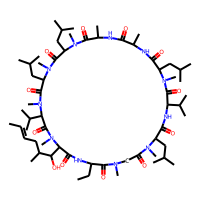
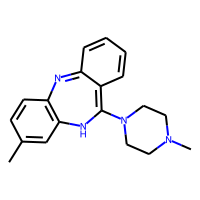
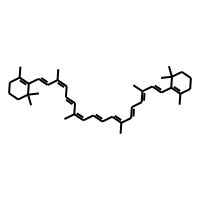
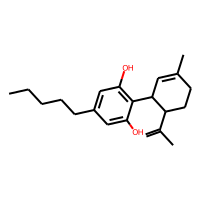

In [3]:
from rdkit.Chem import PandasTools

PandasTools.AddMoleculeColumnToFrame(mol_df, "smiles")
mol_df

In [4]:
## 2. Calculate and plot Ro5 for examples

In [5]:
from rdkit.Chem import Descriptors

mol_df["mwt"] = mol_df["ROMol"].apply(Descriptors.ExactMolWt)
mol_df["nhba"] = mol_df["ROMol"].apply(Descriptors.NumHAcceptors)
mol_df["nhbd"] = mol_df["ROMol"].apply(Descriptors.NumHDonors)
mol_df["logp"] = mol_df["ROMol"].apply(Descriptors.MolLogP)
mol_df["color"] = ["red", "green", "blue", "cyan"]

,name,smiles,ROMol,mwt,nhba,nhbd,logp,color
0,cyclosporine,CCC1C(=O)N(CC(=O)N(C(C(=O)NC(C(=O)N(C(C(=O)NC(...,,1201.841368,12,5,3.26900,red
1,clozapine,CN1CCN(CC1)C2=C3C=CC=CC3=NC4=C(N2)C=C(C=C4)C,,306.184447,4,1,1.68492,green
2,beta-carotene,CC1=C(C(CCC1)(C)C)C=CC(=CC=CC(=CC=CC=C(C)C=CC=...,,536.438202,0,0,12.60580,blue
3,cannabidiol,CCCCCC1=CC(=C(C(=C1)O)C2C=C(CCC2C(=C)C)C)O,,314.224580,2,2,5.84650,cyan

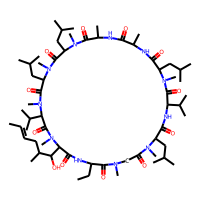
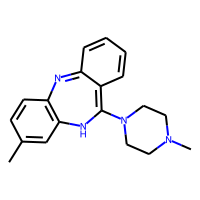
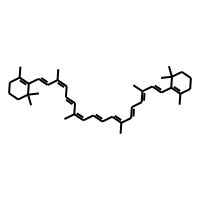
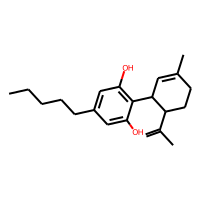

In [6]:
mol_df

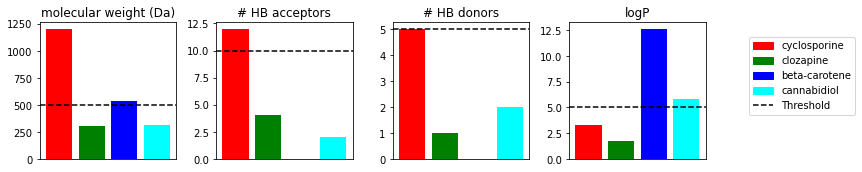

In [7]:
import numpy
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches

ro5_props = {
    "mwt": (500, "molecular weight (Da)"),
    "nhba": (10, "# HB acceptors"),
    "nhbd": (5, "# HB donors"),
    "logp": (5, "logP"),
}

fig, axes = plt.subplots(figsize=(10, 2.5), nrows=1, ncols=4)
x = numpy.arange(1, len(mol_df) + 1)
colors = ["red", "green", "blue", "cyan"]

for index, (key, (thresh, title)) in enumerate(ro5_props.items()):
    axes[index].bar([1, 2, 3, 4], mol_df[key], color=colors)
    axes[index].axhline(y=thresh, color="black", linestyle="dashed")
    axes[index].set_title(title)
    axes[index].set_xticks([])

legend_elements = [
    mpatches.Patch(color=row["color"], label=row["name"])
    for index, row in mol_df.iterrows()
]
legend_elements.append(Line2D([0], [0], color="black", ls="dashed", label="Threshold"))
fig.legend(handles=legend_elements, bbox_to_anchor=(1.2, 0.8))

plt.tight_layout()
plt.show()

## 3. Calculate Ro5 for Examples

In [8]:
from rdkit import Chem

def ro5_properties(smi):
    rdm = Chem.MolFromSmiles(smi)
    # Calculate Ro5 properties
    mwt = Descriptors.ExactMolWt(rdm)
    nhba = Descriptors.NumHAcceptors(rdm)
    nhbd = Descriptors.NumHDonors(rdm)
    logp = Descriptors.MolLogP(rdm)
    # Check conditions
    vals = [mwt <= 500, nhba <= 10, nhbd <= 5, logp <= 5]
    meets_ro5 = sum(vals) >= 3
    return pd.Series(
        [mwt, nhba, nhbd, logp, meets_ro5],
        index=["mwt", "nhba", "nhbd", "logp", "meets_ro5"]
    )

In [9]:
for name, smi in zip(mol_df["name"], mol_df["smiles"]):
    print(f"Ro5 fulfilled for {name}: {ro5_properties(smi)['meets_ro5']}")


Ro5 fulfilled for cyclosporine: False
Ro5 fulfilled for clozapine: True
Ro5 fulfilled for beta-carotene: False
Ro5 fulfilled for cannabidiol: True


## 4. Calculate Ro5 for Dataset

In [10]:
import os

data_path = os.path.join(os.getcwd(), "data")

if not os.path.exists(data_path):
    os.mkdir(data_path)

In [11]:
compounds_file_path = os.path.join(data_path, "EGFR_compounds.csv")
compounds_df = pd.read_csv(compounds_file_path, index_col=0)
compounds_df.head()

,molecule_chembl_id,IC50,units,smiles,pIC50
0,CHEMBL63786,0.003,nM,Brc1cccc(Nc2ncnc3cc4ccccc4cc23)c1,11.522879
1,CHEMBL53711,0.006,nM,CN(C)c1cc2c(Nc3cccc(Br)c3)ncnc2cn1,11.221849
2,CHEMBL35820,0.006,nM,CCOc1cc2ncnc(Nc3cccc(Br)c3)c2cc1OCC,11.221849
3,CHEMBL53753,0.008,nM,CNc1cc2c(Nc3cccc(Br)c3)ncnc2cn1,11.096910
4,CHEMBL66031,0.008,nM,Brc1cccc(Nc2ncnc3cc4[nH]cnc4cc23)c1,11.096910


In [12]:
ro5_df = compounds_df["smiles"].apply(ro5_properties)
ro5_df.head()

,mwt,nhba,nhbd,logp,meets_ro5
0,349.021459,3,1,5.2891,True
1,343.043258,5,1,3.5969,True
2,387.058239,5,1,4.9333,True
3,329.027607,5,2,3.5726,True
4,339.011957,4,2,4.0122,True


Now, join the two tables toget/her.

In [13]:
compounds_df = pd.concat([compounds_df, ro5_df], axis=1)
compounds_df.head()

,molecule_chembl_id,IC50,units,smiles,pIC50,mwt,nhba,nhbd,logp,meets_ro5
0,CHEMBL63786,0.003,nM,Brc1cccc(Nc2ncnc3cc4ccccc4cc23)c1,11.522879,349.021459,3,1,5.2891,True
1,CHEMBL53711,0.006,nM,CN(C)c1cc2c(Nc3cccc(Br)c3)ncnc2cn1,11.221849,343.043258,5,1,3.5969,True
2,CHEMBL35820,0.006,nM,CCOc1cc2ncnc(Nc3cccc(Br)c3)c2cc1OCC,11.221849,387.058239,5,1,4.9333,True
3,CHEMBL53753,0.008,nM,CNc1cc2c(Nc3cccc(Br)c3)ncnc2cn1,11.096910,329.027607,5,2,3.5726,True
4,CHEMBL66031,0.008,nM,Brc1cccc(Nc2ncnc3cc4[nH]cnc4cc23)c1,11.096910,339.011957,4,2,4.0122,True


We can easily view the molecules fulfilling or violating the Ro5.

In [14]:
good_df = compounds_df[compounds_df["meets_ro5"]]
bad_df = compounds_df[~compounds_df["meets_ro5"]]

print(f"# compounds total: {compounds_df.shape[0]}")
print(f"# good compounds: {good_df.shape[0]}")
print(f"# bad compounds: {bad_df.shape[0]}")

# compounds total: 6052
# good compounds: 4929
# bad compounds: 1123


Now, save the results.

In [15]:
file_path = os.path.join(data_path, "EGFR_compounds_with_ro5.csv")
good_df.to_csv(file_path)

In [16]:
good_df.head()

,molecule_chembl_id,IC50,units,smiles,pIC50,mwt,nhba,nhbd,logp,meets_ro5
0,CHEMBL63786,0.003,nM,Brc1cccc(Nc2ncnc3cc4ccccc4cc23)c1,11.522879,349.021459,3,1,5.2891,True
1,CHEMBL53711,0.006,nM,CN(C)c1cc2c(Nc3cccc(Br)c3)ncnc2cn1,11.221849,343.043258,5,1,3.5969,True
2,CHEMBL35820,0.006,nM,CCOc1cc2ncnc(Nc3cccc(Br)c3)c2cc1OCC,11.221849,387.058239,5,1,4.9333,True
3,CHEMBL53753,0.008,nM,CNc1cc2c(Nc3cccc(Br)c3)ncnc2cn1,11.096910,329.027607,5,2,3.5726,True
4,CHEMBL66031,0.008,nM,Brc1cccc(Nc2ncnc3cc4[nH]cnc4cc23)c1,11.096910,339.011957,4,2,4.0122,True


## 5. Visualize Ro5 Properties (Radar Plots)

In [17]:
def mean_and_std(df):
    stats = df.describe()
    stats = stats.T
    stats = stats[["mean", "std"]]
    return stats

In [18]:
stats_df = mean_and_std(
    good_df[["mwt", "nhba", "nhbd", "logp"]]
)
stats_df.head()

,mean,std
mwt,417.403253,88.710187
nhba,6.055589,1.891044
nhbd,1.892473,1.007179
logp,4.073701,1.189679


In [33]:
import math

def scale(stats, thresh_dct, scaled_thresh):
    for prop_name in stats.index:
        if prop_name not in thresh_dct.keys():
            raise KeyError(f"Property '{prop_name}' is missing a threshold.")
    stats_scaled = stats.apply(lambda x: x / thresh_dct[x.name] * scaled_thresh, axis=1)
    return stats_scaled

def radial_angles(naxes):
    angs = [i * 2. * numpy.pi / float(naxes) for i in range(naxes)]
    angs += angs[:1]
    return angs

def plot_radar(
    y,
    thresholds,
    scaled_threshold,
    properties_labels,
    y_max=None,
    output_path=None,
):
    """
    Plot a radar chart based on the mean and standard deviation of a data set's properties.

    Parameters
    ----------
    y : pd.DataFrame
        Dataframe with "mean" and "std" (columns) for each physicochemical property (rows).
    thresholds : dict of str: int
        Thresholds defined for each property.
    scaled_threshold : int or float
        Scaled thresholds across all properties.
    properties_labels : list of str
        List of property names to be used as labels in the plot.
    y_max : None or int or float
        Set maximum y value. If None, let matplotlib decide.
    output_path : None or pathlib.Path
        If not None, save plot to file.
    """

    # Define radial x-axes angles -- uses our helper function!
    x = radial_angles(len(y))
    # Scale y-axis values with respect to a defined threshold -- uses our helper function!
    y = scale(y, thresholds, scaled_threshold)
    # Since our chart will be circular we append the first value of each property to the end
    y = y.append(y.iloc[0])

    # Set figure and subplot axis
    plt.figure(figsize=(6, 6))
    ax = plt.subplot(111, polar=True)

    # Plot data
    ax.fill(x, [scaled_threshold] * len(x), "cornflowerblue", alpha=0.2)
    ax.plot(x, y["mean"], "b", lw=3, ls="-")
    ax.plot(x, y["mean"] + y["std"], "orange", lw=2, ls="--")
    ax.plot(x, y["mean"] - y["std"], "orange", lw=2, ls="-.")

    # From here on, we only do plot cosmetics
    # Set 0° to 12 o'clock
    ax.set_theta_offset(math.pi / 2)
    # Set clockwise rotation
    ax.set_theta_direction(-1)

    # Set y-labels next to 180° radius axis
    ax.set_rlabel_position(180)
    # Set number of radial axes' ticks and remove labels
    plt.xticks(x, [])
    # Get maximal y-ticks value
    if not y_max:
        y_max = int(ax.get_yticks()[-1])
    # Set axes limits
    plt.ylim(0, y_max)
    # Set number and labels of y axis ticks
    plt.yticks(
        range(1, y_max),
        ["5" if i == scaled_threshold else "" for i in range(1, y_max)],
        fontsize=16,
    )

    # Draw ytick labels to make sure they fit properly
    # Note that we use [:1] to exclude the last element which equals the first element (not needed here)
    for i, (angle, label) in enumerate(zip(x[:-1], properties_labels)):
        if angle == 0:
            ha = "center"
        elif 0 < angle < math.pi:
            ha = "left"
        elif angle == math.pi:
            ha = "center"
        else:
            ha = "right"
        ax.text(
            x=angle,
            y=y_max + 1,
            s=label,
            size=16,
            horizontalalignment=ha,
            verticalalignment="center",
        )

    # Add legend relative to top-left plot
    labels = ("mean", "mean + std", "mean - std", "rule of five area")
    ax.legend(labels, loc=(1.1, 0.7), labelspacing=0.3, fontsize=16)

    # Save plot - use bbox_inches to include text boxes
    if output_path:
        plt.savefig(output_path, dpi=300, bbox_inches="tight", transparent=True)

    plt.show()

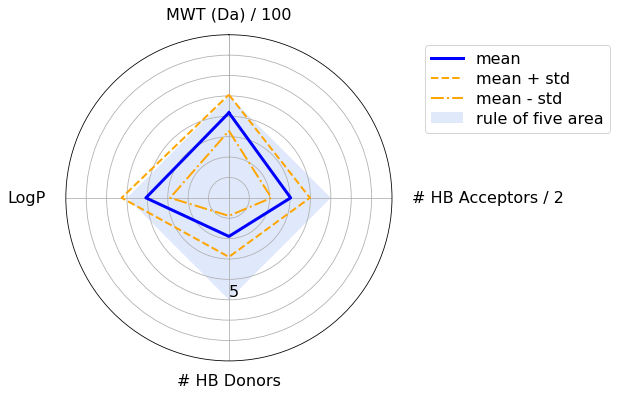

In [34]:
threshs = {"mwt": 500, "nhba": 10, "nhbd": 5, "logp": 5}
scaled_threshold = 5
properties_labels = [
    "MWT (Da) / 100",
    "# HB Acceptors / 2",
    "# HB Donors",
    "LogP",
]
y_max = 8

plot_radar(
    stats_df,
    threshs,
    scaled_threshold,
    properties_labels,
    y_max=y_max,
)